# Домашняя работа №5

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from scipy.stats import pearsonr
import statistics

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [3]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
len(data[data['Dataset']==2])

167

In [5]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

### 1. Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [6]:
direct_bilirubin = data['Direct_Bilirubin']
total_bilirubin = data['Total_Bilirubin']

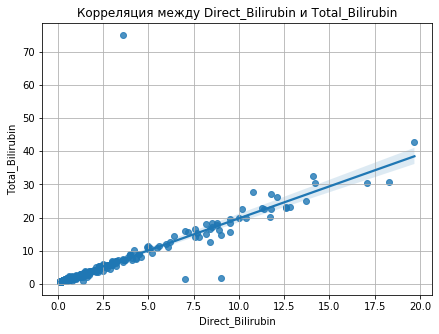

In [7]:
plt.figure(figsize=(7, 5))
sns.regplot(x= direct_bilirubin, y=total_bilirubin, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Корреляция между Direct_Bilirubin и Total_Bilirubin')
plt.grid(True)
plt.show()

**Из графики видно, что в выборке есть странное значение, при высоком общем билирубине низкий прямой.**

**Для более точного расчета корреляции Пирсона уберем это значение из выборки**

In [8]:
data_2= (data[data['Total_Bilirubin'] < 75])

In [9]:
direct_bilirubin_2 = data_2['Direct_Bilirubin']
total_bilirubin_2 = data_2['Total_Bilirubin']

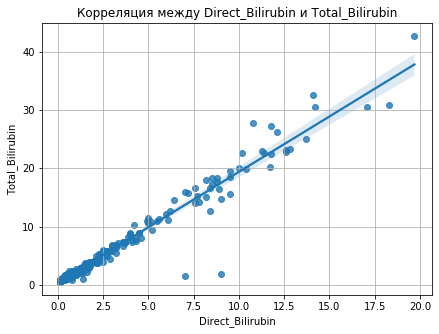

In [10]:
plt.figure(figsize=(7, 5))
sns.regplot(x= direct_bilirubin_2, y=total_bilirubin_2, fit_reg=True)
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Корреляция между Direct_Bilirubin и Total_Bilirubin')
plt.grid(True)
plt.show()

In [11]:
corr, p_value = pearsonr(direct_bilirubin_2, total_bilirubin_2)
print(corr)
print(p_value)

0.9798243666568014
0.0


**Вывод**

*На основании полученного значения коэфициента корреляции Пирсона можно утверждать, что между общим билирубином и прямым существует почти 100 % линейная зависимость*

*С увеличением одного параметра ростет и другой*

### 2. Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [12]:
# Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array (данная библиотека работает с числовыми данными)
direct_bilirubin_3 = np.array(direct_bilirubin_2).reshape(-1,1)
total_bilirubin_3 = np.array(total_bilirubin_2).reshape(-1,1)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [14]:
# Разделим данные на 80% тренировочных и на 20% тестовых
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin_3,
    total_bilirubin_3,
    test_size = 0.2
)

In [15]:
# Обучим модель с помощью fit() метода
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Посмотрим предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

In [17]:
# Посмотрим предсказания модели на тестируемых данных
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(predicted_y, y_test))
print(mean_absolute_error(predicted_y, y_test))

2.9433973096696744
0.549661397991628


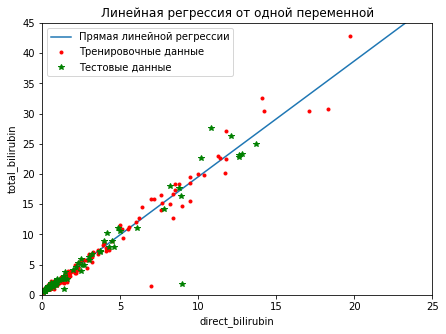

In [18]:
# Построим график линейной регрессии
plt.figure(figsize=(7, 5))
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g*')
plt.xlim(0, 25)
plt.ylim(0, 45)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

### 3.Посчитать квартили для всех **колонок**. 

In [19]:
age = data['Age']

In [20]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [21]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


In [22]:
data_2.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.728522,3.175601,1.482474,290.505155,80.783505,109.986254,6.483677,3.142955,0.947664,1.286942
std,16.198165,5.455335,2.809543,243.140884,182.769631,289.161313,1.086322,0.795757,0.319542,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,42.800000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


 
### 4. Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. 

### Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [23]:
direct_bilirubin_to_50 = data_2[data_2['Age'] < 50]['Direct_Bilirubin']
direct_bilirubin_later_50 = data_2[data_2['Age'] > 50]['Direct_Bilirubin']

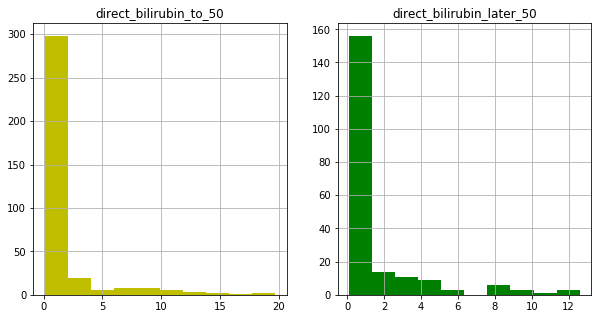

In [24]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(direct_bilirubin_to_50, 10, color='y')
plt.title('direct_bilirubin_to_50')
plt.grid(True)          
plt.subplot(1, 2, 2)
plt.hist(direct_bilirubin_later_50, 10, color='g') 
plt.title('direct_bilirubin_later_50')
plt.grid(True)   

In [25]:
statistics.mean(direct_bilirubin_to_50)

1.4946175637393768

In [26]:
statistics.mean(direct_bilirubin_later_50)

1.4728155339805826

In [27]:
direct_bilirubin_to_50.quantile(0.5)

0.3

In [28]:
direct_bilirubin_later_50.quantile(0.5)

0.4

**Выборки особо не отличаются**

### 5. Посчитать критерий одновыборочный t-критерий для выборки по показанию Total_Bilirubin у больных людей. 

In [29]:
sick_people = data_2[data_2['Dataset'] == 1]['Total_Bilirubin']
len(sick_people)

415

In [30]:
stats.ttest_1samp(sick_people, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.266260804796834, pvalue=0.023950862417344156)

Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? 

Чем выше показатель t тем больше вероятность различий выборки. Кроме того p-value тоже нам говорит об этом. Если он ниже 0.05, то можно утверждать, что наши выборки отличаются и наоборот.

Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных  - 1). Если t-value, посчитанное с помощью теста, больше порогового табличного, то мы отклоняем нулевую гипотезу о сходстве.

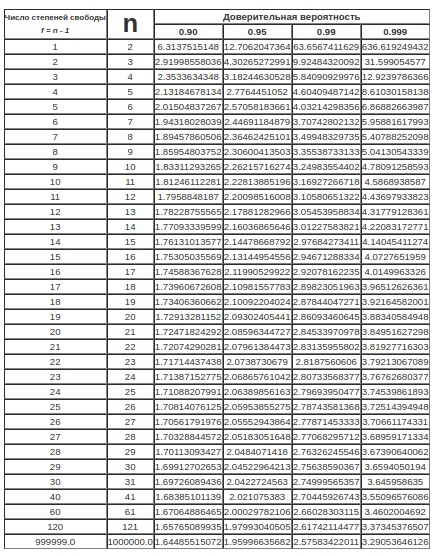

In [31]:
from IPython.display import Image
Image('C:\\Users\\natarov_ip\\Desktop\\Критерий Стьюдента.jpg', width=600)

Гипотеза о сходстве откланяется, так как t-value выше табличного значения.

### 6. Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть (по p-value)?

In [32]:
healthy_people = data_2[data_2['Dataset'] == 2]['Total_Bilirubin']

In [33]:
stats.ttest_ind(sick_people, healthy_people)

Ttest_indResult(statistic=5.8649857449009275, pvalue=7.548849823227222e-09)

In [35]:
statistics.mean(sick_people)

3.9937349397590363

In [34]:
statistics.mean(healthy_people)

1.1425149700598802

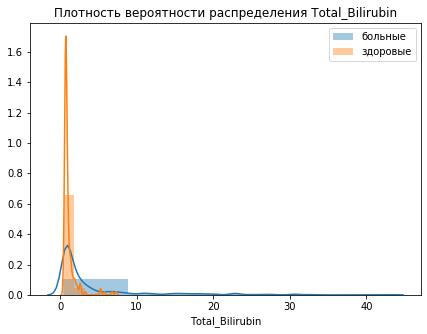

In [52]:
plt.figure(figsize=(7, 5))
sns.distplot(sick_people, 5)
sns.distplot(healthy_people, 5)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'здоровые'])
plt.show()

Учитывая высокий уровень t-value и низкий уровень p-value можно сделать вывод, что данные группы не схожи.

### 7.Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью: будут ли эти группы отличаться в дейстивельности (на ваш взгляд).

In [54]:
group_1 = data_2[data_2['Age'] <= 30]['Dataset']

group_2 = data_2[(data_2['Age'] >= 30) & (data_2['Age'] <= 50)]['Dataset']

group_3 = data_2[data_2['Age'] > 55]['Dataset']

stats.f_oneway(group_1, group_2, group_3)

F_onewayResult(statistic=7.565748561559339, pvalue=0.000574577326261288)

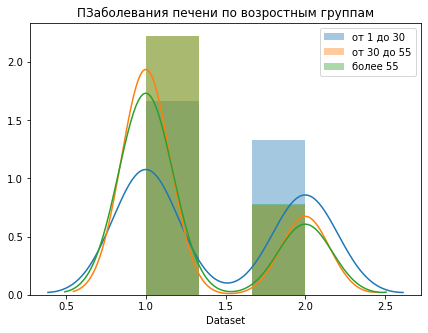

In [61]:
plt.figure(figsize=(7, 5))
sns.distplot(group_1, 3)
sns.distplot(group_2, 3)
sns.distplot(group_3, 3)
plt.title('ПЗаболевания печени по возростным группам')
plt.legend(['от 1 до 30 ', 'от 30 до 55', 'более 55'])
plt.show()

На мой взгляд данные группы будут совершенно точно отличаться в действительность. Люди второй и третьей группы на мой взгляд болле подверженны печеночными заболиваниями в виду возроста. Данное различе между группами также подтверждается pvalue, который < 0.05.